# Md. Irfan Hossain

Student of Data Visualization with Python course offered by EMK Center

#### Import required libraries and packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data file as dataframe

In [24]:
df = pd.read_csv("audi.csv")

display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


#### Checking missing values, column types for consistancy

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
model           10668 non-null object
year            10668 non-null int64
price           10668 non-null int64
transmission    10668 non-null object
mileage         10668 non-null int64
fuelType        10668 non-null object
mpg             10668 non-null float64
engineSize      10668 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.8+ KB


None

#### Creating a function to check columns

In [8]:
def check(data, column):
    df_count=data[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    return df_count

#### Checking the 'model' column

In [26]:
model_count = check(df, 'model')
display(model_count)

,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27
5,Q5,877,8.22
6,Q2,822,7.71
7,A6,748,7.01
8,Q7,397,3.72
9,TT,336,3.15


#### Checking the 'year' column

In [11]:
year_count = check(df,'year')
display(year_count)

,year,No_of_cars,% of cars
0,2019,3197,29.97
1,2016,1964,18.41
2,2017,1935,18.14
3,2015,999,9.36
4,2018,864,8.10
5,2020,716,6.71
6,2014,447,4.19
7,2013,291,2.73
8,2012,85,0.80
9,2011,47,0.44


#### We have to sort the year_count DataFrame based on 'year'

In [12]:
year_count = year_count.sort_values(by='year')
display(year_count)

,year,No_of_cars,% of cars
19,1997,1,0.01
20,1998,1,0.01
18,2002,2,0.02
16,2003,6,0.06
17,2004,5,0.05
15,2005,7,0.07
14,2006,9,0.08
13,2007,16,0.15
12,2008,21,0.20
11,2009,23,0.22


#### Checking the 'transmission' column

In [13]:
transmission_count = check(df,'transmission')
display(transmission_count)

,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


#### Checking the 'fuelType' column

In [14]:
fuelType_count = check(df,'fuelType')
display(fuelType_count)

,fuelType,No_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


#### Creating a function to show the number of cars for each unique value in a column using a barplot

In [17]:
def bar_plot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

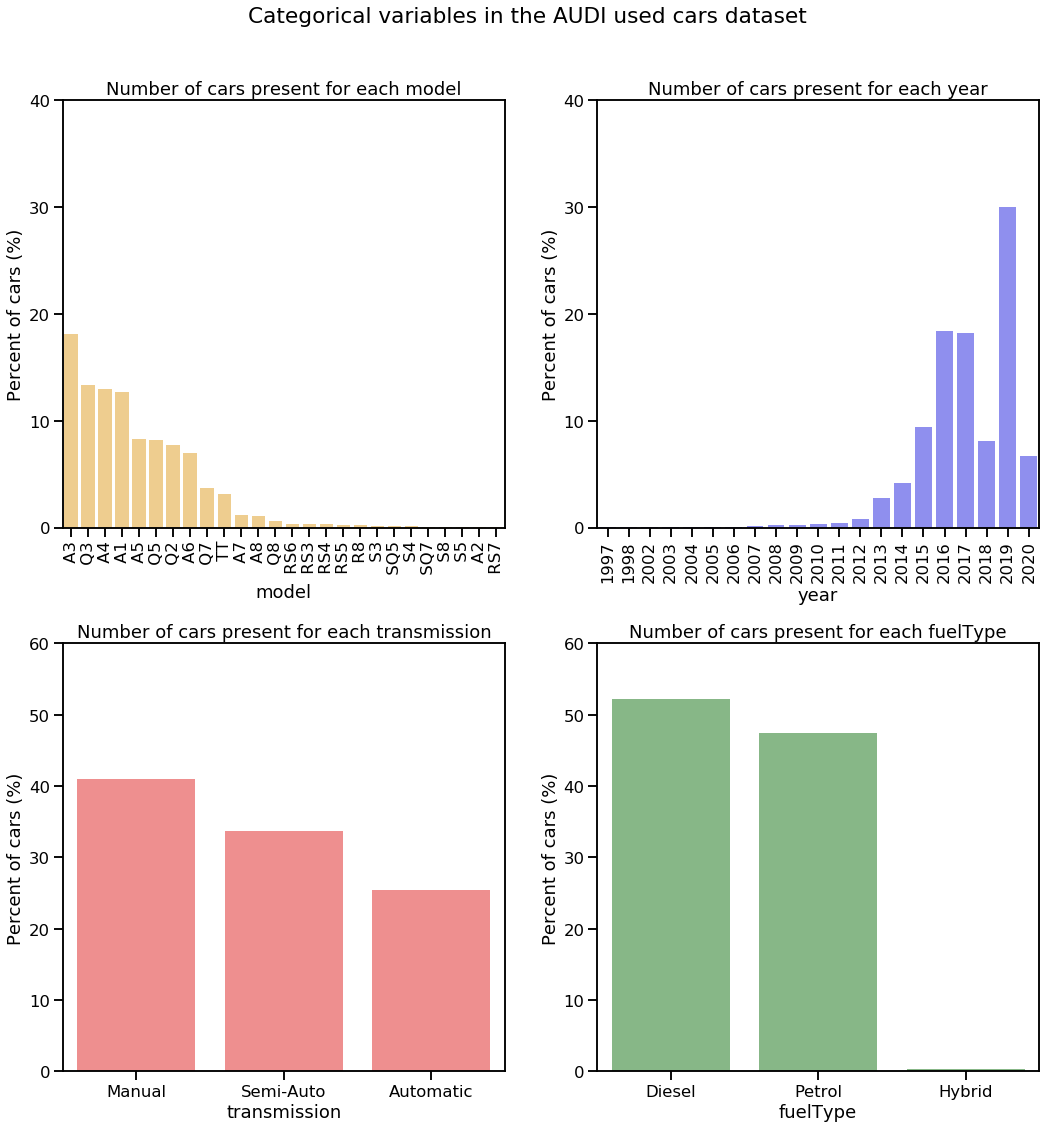

In [22]:
sns.set_context('talk')

plt.figure(figsize=(15,15))

# row 1, column 1
plt.subplot(2,2,1)
bar_plot(model_count, 'model', 'orange', 90, np.arange(0,41,10))

# row 1, column 2
plt.subplot(2,2,2)
bar_plot(year_count, 'year', 'blue', 90, np.arange(0,41,10))

# row 2, column 1
plt.subplot(2,2,3)
bar_plot(transmission_count, 'transmission', 'red', 0, np.arange(0,61,10))

# row 2, column 2
plt.subplot(2,2,4)
bar_plot(fuelType_count, 'fuelType', 'green', 0, np.arange(0,61,10))

# write the title for all the plots
plt.suptitle("Categorical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()